In [1]:
import os

class cfg():
    data_path = "/Users/user/Desktop/Algorun_24/data/data"

    seed = 42

    holidays_path = os.path.join(data_path, "holidays.csv")
    products_path = os.path.join(data_path, "products.csv")
    promotions_path = os.path.join(data_path, "promotions.csv")
    sample_submission_path = os.path.join(data_path, "sample_submission.csv")
    test_path = os.path.join(data_path, "test.csv")
    train_path = os.path.join(data_path, "train.csv")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
holidays_df = pd.read_csv(cfg.holidays_path)
products_df = pd.read_csv(cfg.products_path)
promotions_df = pd.read_csv(cfg.promotions_path)
sample_submission_df = pd.read_csv(cfg.sample_submission_path, delimiter='|')
test_df = pd.read_csv(cfg.test_path)
train_df = pd.read_csv(cfg.train_path)

In [4]:
# Convert columns to datetime format

train_df["week_starting_date"] = pd.to_datetime(train_df["week_starting_date"])
test_df["week_starting_date"] = pd.to_datetime(test_df["week_starting_date"])
sample_submission_df["week_starting_date"] = pd.to_datetime(sample_submission_df["week_starting_date"])


In [5]:
train_df

,product_id,week_starting_date,sales_quantity,inventory,sales_revenue,price_without_tax,initial_price
0,0,2022-07-14,8.0,NaN,37.12,NaN,NaN
1,0,2023-07-13,7.0,NaN,34.50,NaN,NaN
2,0,2023-10-05,3.0,NaN,13.11,NaN,NaN
3,1,2023-03-23,2.0,NaN,7.50,NaN,NaN
4,4,2024-06-13,0.0,0.0,0.00,69.99,69.99
...,...,...,...,...,...,...,...
1763854,89712,2022-05-26,11.0,136.0,249.47,29.98,34.99
1763855,89712,2022-10-06,2.0,5.0,38.65,25.98,34.99
1763856,89715,2022-04-07,130.0,6670.0,6041.07,49.99,59.99
1763857,89715,2023-01-12,92.0,2713.0,4918.02,54.99,59.99


In [6]:
test_df

,product_id,week_starting_date,price_without_tax,initial_price
0,63709,2024-07-25,29.980000,34.990002
1,78679,2024-07-11,55.980000,97.989998
2,80430,2024-08-01,55.980000,79.989998
3,14405,2024-07-25,39.980000,74.989998
4,8457,2024-07-18,99.989998,99.989998
...,...,...,...,...
144975,85455,2024-07-25,7.980000,29.990000
144976,13868,2024-08-01,44.990002,51.990002
144977,72117,2024-07-18,59.990002,59.990002
144978,2541,2024-07-11,65.980003,78.989998


In [7]:
# Get unique product_ids from train_df
unique_product_ids_train = train_df['product_id'].unique()

unique_product_ids_test = test_df['product_id'].unique()

In [8]:
# Compare unique product ids between train_df and test_df

common_ids = set(train_df['product_id']).intersection(set(test_df['product_id']))


In [9]:
len(unique_product_ids_train)

56267

In [10]:
len(unique_product_ids_test)

36245

In [11]:
len(common_ids)

35645

In [12]:
products_df

,product_id,brand,product_group_1_code,product_group_2_code,product_group_3_code,product_group_4_code
0,2,200,2,4,9,28
1,3,77,4,3,12,34
2,4,322,4,2,13,31
3,6,125,4,3,13,16
4,16,152,4,2,1,45
...,...,...,...,...,...,...
89713,89677,43,0,1,0,40
89714,89685,125,4,3,13,16
89715,89688,337,4,2,0,6
89716,89691,247,1,2,0,31


In [13]:
promotions_df

,start_date,end_date,promotion_type
0,4/8/2022,4/18/2022,Promotion 3
1,5/5/2022,5/9/2022,Promotion 1
2,5/26/2022,5/30/2022,Promotion 3
3,6/16/2022,6/21/2022,Promotion 1
4,7/11/2022,7/13/2022,Promotion 3
...,...,...,...
95,7/18/2024,7/28/2024,Promotion 3
96,7/18/2024,7/28/2024,Promotion 3
97,7/18/2024,7/28/2024,Promotion 3
98,7/18/2024,7/28/2024,Promotion 3


In [14]:
sample_submission_df

,product_id,week_starting_date,prediction
0,63709,2024-07-25,0
1,78679,2024-07-11,0
2,80430,2024-08-01,0
3,14405,2024-07-25,0
4,8457,2024-07-18,0
...,...,...,...
144975,85455,2024-07-25,0
144976,13868,2024-08-01,0
144977,72117,2024-07-18,0
144978,2541,2024-07-11,0


In [15]:
# Add product_group_id column to train

train_df = train_df.merge(products_df, on='product_id', how='left')

In [16]:
train_df

,product_id,week_starting_date,sales_quantity,inventory,sales_revenue,price_without_tax,initial_price,brand,product_group_1_code,product_group_2_code,product_group_3_code,product_group_4_code
0,0,2022-07-14,8.0,NaN,37.12,NaN,NaN,15,1,0,2,44
1,0,2023-07-13,7.0,NaN,34.50,NaN,NaN,15,1,0,2,44
2,0,2023-10-05,3.0,NaN,13.11,NaN,NaN,15,1,0,2,44
3,1,2023-03-23,2.0,NaN,7.50,NaN,NaN,313,4,2,12,34
4,4,2024-06-13,0.0,0.0,0.00,69.99,69.99,322,4,2,13,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1763854,89712,2022-05-26,11.0,136.0,249.47,29.98,34.99,113,4,3,12,17
1763855,89712,2022-10-06,2.0,5.0,38.65,25.98,34.99,113,4,3,12,17
1763856,89715,2022-04-07,130.0,6670.0,6041.07,49.99,59.99,85,4,5,12,17
1763857,89715,2023-01-12,92.0,2713.0,4918.02,54.99,59.99,85,4,5,12,17


In [17]:
# Combine sales based on product group_id

sales_based_on_product_group_1 = train_df.groupby('product_group_1_code')

sales_based_on_product_group_1

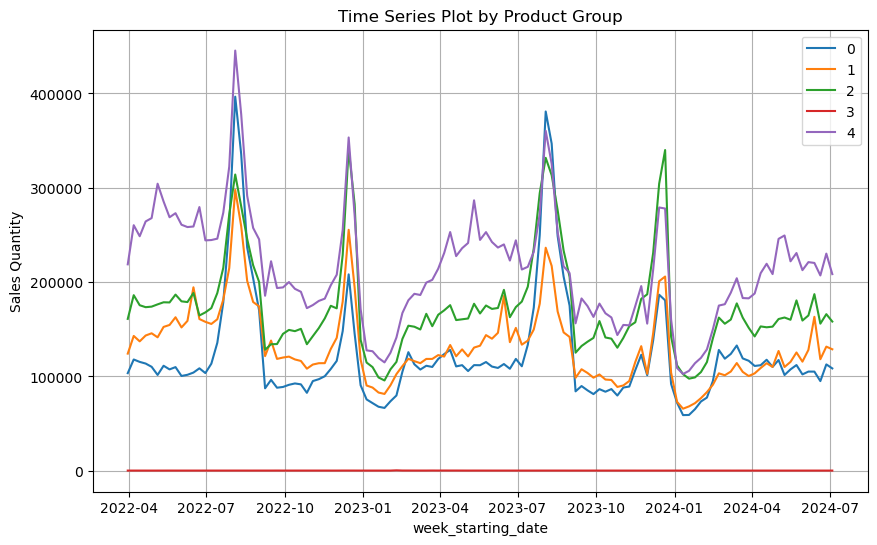

In [18]:
# Group the data by 'product_group_1_code' and 'starting_week', then sum the 'sales_quantity'
grouped_df = train_df.groupby(['product_group_1_code', 'week_starting_date']).sum().reset_index()

# Create the time series plot
plt.figure(figsize=(10, 6))

for name, group in grouped_df.groupby('product_group_1_code'):
    plt.plot(group['week_starting_date'], group['sales_quantity'], label=name)

plt.xlabel('week_starting_date')
plt.ylabel('Sales Quantity')
plt.title('Time Series Plot by Product Group')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# First submission based on the exact sale puantities of last year

first_submission_df = sample_submission_df.copy()

# Shift train_df 53 weeks

shifted_train_df = train_df.copy()
shifted_train_df["week_starting_date"] = train_df["week_starting_date"] + dt.timedelta(days=371)

prepared_shifted_train_df = shifted_train_df.loc[:, ["week_starting_date", "product_id", "sales_quantity"]]

first_submission_df = first_submission_df.merge(prepared_shifted_train_df, on=["week_starting_date", "product_id"], how="left")

In [20]:
first_submission_df

,product_id,week_starting_date,prediction,sales_quantity
0,63709,2024-07-25,0,NaN
1,78679,2024-07-11,0,NaN
2,80430,2024-08-01,0,NaN
3,14405,2024-07-25,0,NaN
4,8457,2024-07-18,0,NaN
...,...,...,...,...
144975,85455,2024-07-25,0,157.0
144976,13868,2024-08-01,0,NaN
144977,72117,2024-07-18,0,NaN
144978,2541,2024-07-11,0,NaN


In [21]:
first_submission_df.describe()

,product_id,prediction,sales_quantity
count,144980.000000,144980.0,44754.000000
mean,43665.162974,0.0,69.253050
std,24801.597894,0.0,194.169662
min,2.000000,0.0,-11.000000
25%,22941.000000,0.0,1.000000
50%,42246.000000,0.0,2.000000
75%,64544.000000,0.0,43.000000
max,89717.000000,0.0,5872.000000


In [22]:
# First submission'ı yapmamaya karar verdim!!!!!!!





In [23]:
# Second submission olarak aynı sayının devam edeceğini yolladım. PL RMSLE: 0.49731

train_df["week_starting_date"].max()

last_train_values_df = train_df[train_df["week_starting_date"] == train_df["week_starting_date"].max()]
last_train_values_df = last_train_values_df[["product_id", "sales_quantity"]]

second_submission_df = sample_submission_df.copy()

second_submission_df = second_submission_df.merge(last_train_values_df, on="product_id", how="left")

second_submission_df["prediction"] = second_submission_df["sales_quantity"]

second_submission_df = second_submission_df[["product_id", "week_starting_date", "prediction"]]

# Making negative numbers in prediction equal to 0
second_submission_df.loc[second_submission_df["prediction"] < 0, "prediction"] = 0

second_submission_df.fillna(0,inplace=True)



In [24]:
second_submission_df.describe()

,product_id,prediction
count,144980.000000,144980.000000
mean,43665.162974,16.647841
std,24801.597894,86.064613
min,2.000000,0.000000
25%,22941.000000,0.000000
50%,42246.000000,0.000000
75%,64544.000000,0.000000
max,89717.000000,3578.000000


In [25]:
second_submission_df.to_csv('second_submission.csv', index=False,sep="|")

In [26]:
second_submission_df

,product_id,week_starting_date,prediction
0,63709,2024-07-25,0.0
1,78679,2024-07-11,0.0
2,80430,2024-08-01,1.0
3,14405,2024-07-25,0.0
4,8457,2024-07-18,0.0
...,...,...,...
144975,85455,2024-07-25,0.0
144976,13868,2024-08-01,0.0
144977,72117,2024-07-18,0.0
144978,2541,2024-07-11,0.0


In [27]:
second_submission_df = second_submission_df.merge(last_train_values_df, on="product_id", how="left").describe()

In [28]:
(144980.0-142328.000000)/4

663.0

In [29]:
last_train_values_df

,product_id,sales_quantity
6,26,0.0
13,73,0.0
39,153,0.0
71,326,0.0
100,541,0.0
...,...,...
1763415,89188,1.0
1763521,89303,0.0
1763569,89372,0.0
1763635,89476,0.0


In [30]:
sample_submission_df

,product_id,week_starting_date,prediction
0,63709,2024-07-25,0
1,78679,2024-07-11,0
2,80430,2024-08-01,0
3,14405,2024-07-25,0
4,8457,2024-07-18,0
...,...,...,...
144975,85455,2024-07-25,0
144976,13868,2024-08-01,0
144977,72117,2024-07-18,0
144978,2541,2024-07-11,0


In [31]:
test_df["week_starting_date"].unique()

array(['2024-07-25T00:00:00.000000000', '2024-07-11T00:00:00.000000000',
       '2024-08-01T00:00:00.000000000', '2024-07-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [32]:
train_df

,product_id,week_starting_date,sales_quantity,inventory,sales_revenue,price_without_tax,initial_price,brand,product_group_1_code,product_group_2_code,product_group_3_code,product_group_4_code
0,0,2022-07-14,8.0,NaN,37.12,NaN,NaN,15,1,0,2,44
1,0,2023-07-13,7.0,NaN,34.50,NaN,NaN,15,1,0,2,44
2,0,2023-10-05,3.0,NaN,13.11,NaN,NaN,15,1,0,2,44
3,1,2023-03-23,2.0,NaN,7.50,NaN,NaN,313,4,2,12,34
4,4,2024-06-13,0.0,0.0,0.00,69.99,69.99,322,4,2,13,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1763854,89712,2022-05-26,11.0,136.0,249.47,29.98,34.99,113,4,3,12,17
1763855,89712,2022-10-06,2.0,5.0,38.65,25.98,34.99,113,4,3,12,17
1763856,89715,2022-04-07,130.0,6670.0,6041.07,49.99,59.99,85,4,5,12,17
1763857,89715,2023-01-12,92.0,2713.0,4918.02,54.99,59.99,85,4,5,12,17


In [33]:
test_df

,product_id,week_starting_date,price_without_tax,initial_price
0,63709,2024-07-25,29.980000,34.990002
1,78679,2024-07-11,55.980000,97.989998
2,80430,2024-08-01,55.980000,79.989998
3,14405,2024-07-25,39.980000,74.989998
4,8457,2024-07-18,99.989998,99.989998
...,...,...,...,...
144975,85455,2024-07-25,7.980000,29.990000
144976,13868,2024-08-01,44.990002,51.990002
144977,72117,2024-07-18,59.990002,59.990002
144978,2541,2024-07-11,65.980003,78.989998


In [34]:
# Third submission based on the sale of product groups during last year same_time, and ratio of sale of products in the last 2 months

import pandas as pd
from datetime import datetime, timedelta

# Assuming your DataFrame 'df' has columns: 'product_id', 'product_group', 'sale_date', 'sale_amount'

shifted_train_df = train_df.copy()
shifted_train_df["week_starting_date"] = train_df["week_starting_date"] + dt.timedelta(days=371)

important_dates1 = list(test_df["week_starting_date"].unique())
prepared_shifted_train_df = shifted_train_df[
    shifted_train_df["week_starting_date"].isin(important_dates1)
][["week_starting_date", "product_id", "sales_quantity", "product_group_1_code"]]

# Group by week_starting_date and product_group_1_code and sum the sales_quantity
grouped_sales = prepared_shifted_train_df.groupby(
    ['week_starting_date', 'product_group_1_code'])['sales_quantity'].sum().reset_index()

# If you want to reshape the data to have product groups as columns
# pivoted_sales = grouped_sales.pivot(
#     index='week_starting_date', 
#     columns='product_group_1_code', 
#     values='sales_quantity'
# )




In [35]:
# First calculate the ratios as before
last_date = train_df['week_starting_date'].max()
two_months_ago = last_date - pd.DateOffset(months=2)
last_2months_df = train_df[train_df['week_starting_date'] >= two_months_ago]

# Calculate ratios
product_sales = last_2months_df.groupby('product_id')['sales_quantity'].sum()
group_sales = last_2months_df.groupby('product_group_1_code')['sales_quantity'].sum()

sales_ratio = (
    last_2months_df[['product_id', 'product_group_1_code']]
    .drop_duplicates()
    .set_index('product_id')
)

sales_ratio['product_sales'] = product_sales
sales_ratio['group_total_sales'] = sales_ratio['product_group_1_code'].map(group_sales)
sales_ratio['sales_ratio'] = sales_ratio['product_sales'] / sales_ratio['group_total_sales']
sales_ratio = sales_ratio.reset_index()



In [36]:
# Perform a merge operation instead of iterating
merged_data = pd.merge(
    grouped_sales[['week_starting_date', 'product_group_1_code', 'sales_quantity']],
    sales_ratio[['product_group_1_code', 'product_id', 'sales_ratio']],
    on='product_group_1_code'
)

# Vectorized calculation of predicted sales
merged_data['predicted_sales'] = merged_data['sales_quantity'] * merged_data['sales_ratio']

# Select required columns for final output
predictions_df = merged_data[['week_starting_date', 'product_id', 
                            'product_group_1_code', 'predicted_sales']]

In [37]:
predictions_df

,week_starting_date,product_id,product_group_1_code,predicted_sales
0,2024-07-11,1479,0,0.000000
1,2024-07-11,1807,0,0.233278
2,2024-07-11,1928,0,0.000000
3,2024-07-11,2034,0,0.000000
4,2024-07-11,2060,0,0.000000
...,...,...,...,...
173771,2024-08-01,53159,4,0.000000
173772,2024-08-01,53353,4,0.136053
173773,2024-08-01,3680,4,0.000000
173774,2024-08-01,7475,4,0.136053


In [38]:
third_submission_df = sample_submission_df.copy()

third_submission_df = third_submission_df.merge(predictions_df, on=["product_id","week_starting_date"], how="left")

third_submission_df["prediction"] = third_submission_df["predicted_sales"]

third_submission_df = third_submission_df[["product_id", "week_starting_date", "prediction"]]

# Making negative numbers in prediction equal to 0
third_submission_df.loc[third_submission_df["prediction"] < 0, "prediction"] = 0

third_submission_df.fillna(0,inplace=True)

In [39]:
third_submission_df.describe()

,product_id,prediction
count,144980.000000,144980.000000
mean,43665.162974,21.391205
std,24801.597894,110.803758
min,2.000000,0.000000
25%,22941.000000,0.000000
50%,42246.000000,0.106552
75%,64544.000000,0.431919
max,89717.000000,5881.379972


In [40]:
third_submission_df.to_csv('third_submission.csv', index=False,sep="|")

In [41]:
third_submission_df

,product_id,week_starting_date,prediction
0,63709,2024-07-25,0.000000
1,78679,2024-07-11,0.000000
2,80430,2024-08-01,0.136053
3,14405,2024-07-25,0.131783
4,8457,2024-07-18,0.000000
...,...,...,...
144975,85455,2024-07-25,0.000000
144976,13868,2024-08-01,0.000000
144977,72117,2024-07-18,0.000000
144978,2541,2024-07-11,0.106552


45496 was the only product in group_1_code == 3 

In [42]:
predictions_df.describe()

,product_id,product_group_1_code,predicted_sales
count,173776.000000,173776.000000,173776.000000
mean,43328.625794,2.863618,17.855820
std,25188.413096,1.577871,101.526238
min,0.000000,0.000000,-0.680267
25%,20935.750000,1.000000,0.000000
50%,42691.500000,4.000000,0.000000
75%,63920.750000,4.000000,0.272107
max,89717.000000,4.000000,5881.379972


In [43]:
predictions_df.sort_values(by='predicted_sales', ascending=False)

,week_starting_date,product_id,product_group_1_code,predicted_sales
60389,2024-08-01,23072,2,5881.379972
57236,2024-07-25,23072,2,4710.839277
163285,2024-08-01,63841,4,4352.074163
59925,2024-08-01,22953,2,4022.733055
54083,2024-07-18,23072,2,3897.465870
...,...,...,...,...
18113,2024-08-01,40509,0,-0.526841
90115,2024-07-11,15860,4,-0.532759
117909,2024-07-18,15860,4,-0.539898
145703,2024-07-25,15860,4,-0.579749


In [44]:
sample_submission_df

,product_id,week_starting_date,prediction
0,63709,2024-07-25,0
1,78679,2024-07-11,0
2,80430,2024-08-01,0
3,14405,2024-07-25,0
4,8457,2024-07-18,0
...,...,...,...
144975,85455,2024-07-25,0
144976,13868,2024-08-01,0
144977,72117,2024-07-18,0
144978,2541,2024-07-11,0


In [45]:
grouped_sales

,week_starting_date,product_group_1_code,sales_quantity
0,2024-07-11,0,110641.0
1,2024-07-11,1,133542.0
2,2024-07-11,2,179255.0
3,2024-07-11,3,6.0
4,2024-07-11,4,213273.0
5,2024-07-18,0,133403.0
6,2024-07-18,1,137843.0
7,2024-07-18,2,195033.0
8,2024-07-18,3,6.0
9,2024-07-18,4,216131.0


In [46]:
prepared_shifted_train_df

,week_starting_date,product_id,sales_quantity,product_group_1_code
1,2024-07-18,0,7.0,1
9,2024-08-01,61,2.0,2
33,2024-07-18,143,0.0,2
52,2024-07-11,230,1.0,4
165,2024-08-01,854,1.0,4
...,...,...,...,...
1763742,2024-08-01,89579,105.0,4
1763766,2024-07-25,89607,2.0,4
1763790,2024-07-11,89620,0.0,0
1763834,2024-07-11,89664,0.0,4


In [47]:
"2024-07-11" in shifted_train_df

False

In [48]:
# 2. Calculate last year's sales for each product group
last_year_sales = df[(df['sale_date'] >= last_year_start_date) & (df['sale_date'] <= last_year_end_date)] \
    .groupby('product_group')['sale_amount'].sum()

# 3. Calculate the recent sales ratio for each product within a group
two_months_ago = datetime.now() - timedelta(days=60)
recent_sales = df[df['sale_date'] >= two_months_ago] \
    .groupby(['product_group', 'product_id'])['sale_amount'].sum()

recent_sales_ratio = recent_sales.groupby(level='product_group').apply(lambda x: x / x.sum())

# 4. Combine the information and make the second submission
second_submission = pd.DataFrame({'last_year_sales': last_year_sales, 'recent_sales_ratio': recent_sales_ratio})

# Now, you can use this `second_submission` DataFrame to make your second submission.
# You might want to further process it, such as multiplying the 'last_year_sales' by the 'recent_sales_ratio'
# to get an adjusted sales figure for each product group.


NameError: name 'df' is not defined

In [ ]:
shifted_train_df

,product_id,week_starting_date,sales_quantity,inventory,sales_revenue,price_without_tax,initial_price,brand,product_group_1_code,product_group_2_code,product_group_3_code,product_group_4_code
0,0,2023-07-20,8.0,NaN,37.12,NaN,NaN,15,1,0,2,44
1,0,2024-07-18,7.0,NaN,34.50,NaN,NaN,15,1,0,2,44
2,0,2024-10-10,3.0,NaN,13.11,NaN,NaN,15,1,0,2,44
3,1,2024-03-28,2.0,NaN,7.50,NaN,NaN,313,4,2,12,34
4,4,2025-06-19,0.0,0.0,0.00,69.99,69.99,322,4,2,13,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1763854,89712,2023-06-01,11.0,136.0,249.47,29.98,34.99,113,4,3,12,17
1763855,89712,2023-10-12,2.0,5.0,38.65,25.98,34.99,113,4,3,12,17
1763856,89715,2023-04-13,130.0,6670.0,6041.07,49.99,59.99,85,4,5,12,17
1763857,89715,2024-01-18,92.0,2713.0,4918.02,54.99,59.99,85,4,5,12,17


In [ ]:
train_df

,product_id,week_starting_date,sales_quantity,inventory,sales_revenue,price_without_tax,initial_price,brand,product_group_1_code,product_group_2_code,product_group_3_code,product_group_4_code
0,0,2022-07-14,8.0,NaN,37.12,NaN,NaN,15,1,0,2,44
1,0,2023-07-13,7.0,NaN,34.50,NaN,NaN,15,1,0,2,44
2,0,2023-10-05,3.0,NaN,13.11,NaN,NaN,15,1,0,2,44
3,1,2023-03-23,2.0,NaN,7.50,NaN,NaN,313,4,2,12,34
4,4,2024-06-13,0.0,0.0,0.00,69.99,69.99,322,4,2,13,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1763854,89712,2022-05-26,11.0,136.0,249.47,29.98,34.99,113,4,3,12,17
1763855,89712,2022-10-06,2.0,5.0,38.65,25.98,34.99,113,4,3,12,17
1763856,89715,2022-04-07,130.0,6670.0,6041.07,49.99,59.99,85,4,5,12,17
1763857,89715,2023-01-12,92.0,2713.0,4918.02,54.99,59.99,85,4,5,12,17


In [ ]:
first_submission_df

,product_id,week_starting_date,prediction
0,63709,2024-07-25,0
1,78679,2024-07-11,0
2,80430,2024-08-01,0
3,14405,2024-07-25,0
4,8457,2024-07-18,0
...,...,...,...
144975,85455,2024-07-25,0
144976,13868,2024-08-01,0
144977,72117,2024-07-18,0
144978,2541,2024-07-11,0


In [ ]:



def find_closest_date(row, df):
    product_id = row['product_id']
    current_date = row['week_starting_date']
    
    # Calculate the date range for the previous year
    prev_year_start = current_date - pd.DateOffset(years=1)
    prev_year_end = prev_year_start + pd.DateOffset(weeks=52)
    
    # Filter the DataFrame for the given product ID and date range
    filtered_df = df[(df['product_id'] == product_id) & 
                     (df['week_starting_date'] >= prev_year_start) & 
                     (df['week_starting_date'] <= prev_year_end)]
    
    # Find the closest date
    closest_date = filtered_df.loc[filtered_df['week_starting_date'].sub(current_date).abs().idxmin(), 'week_starting_date']
    
    return closest_date

# Assuming 'first_submission_df' is your DataFrame
first_submission_df['prediction'] = first_submission_df.apply(find_closest_date, axis=1, args=(first_submission_df,))

ValueError: attempt to get argmin of an empty sequence